## 복습 퀴즈

In [8]:
import pandas as pd
import numpy as np

In [9]:
df = pd.read_csv("./data/titanic_train.csv", encoding="utf-8")

In [10]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### 1. 승선지가 S이고 1등석 승객들 중 운임을 많이 지불한 상위 5명의 승객들의 이름과 지불 금액, 승선지를 읽어오세요

In [16]:
df[(df["Embarked"] == "S") & (df["Pclass"] == 1)] \
    .sort_values(by=["Fare"], ascending=False) \
    .iloc[:5] \
    [["Name", "Fare", "Embarked"]]

,Name,Fare,Embarked
27,"Fortune, Mr. Charles Alexander",263.0000,S
88,"Fortune, Miss. Mabel Helen",263.0000,S
341,"Fortune, Miss. Alice Elizabeth",263.0000,S
438,"Fortune, Mr. Mark",263.0000,S
527,"Farthing, Mr. John",221.7792,S


### 2. 동승한 가족 수를 나타내는 FamilySize라는 컬럼을 새로 추가하고 싶습니다. SibSp 값과 Parch 컬럼 값을 합친 FamilySize라는 컬럼을 추가하세요

In [20]:
df["FamilySize"] = df["SibSp"] + df["Parch"]

In [21]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0


### 3. 생존자들의 Age, Fare, FamilySize 컬럼에 대한 기초 통계량을 계산하세요

In [27]:
import time

start = time.time()
df.describe()[["Age"]]
print("소요시간", time.time() - start)

소요시간 0.023495912551879883


In [28]:
start = time.time()
df[["Age"]].describe()
print("소요시간", time.time() - start)

소요시간 0.009762048721313477


### 4. 데이터 프레임의 plot 함수를 이용하여 Age 컬럼의 히스토그램과 박스 플랏을 그려보세요. 히스토그램의 x축은 0부터 80 사이 5살 간격으로 설정해주세요

<Axes: >

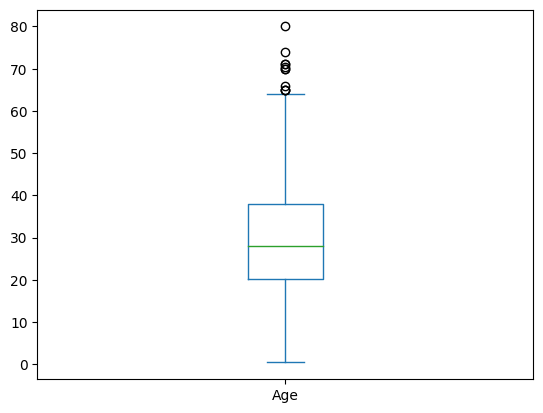

In [30]:
df["Age"].plot(kind="box")

<Axes: >

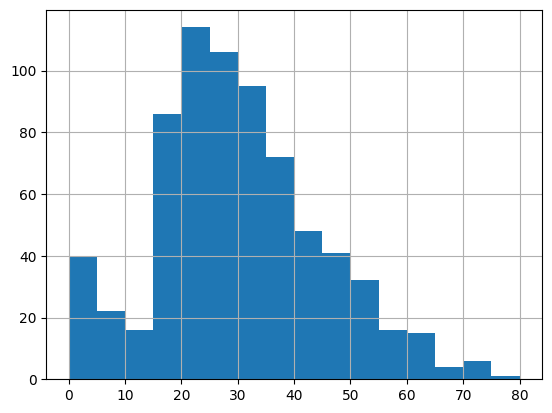

In [34]:
df["Age"].hist(bins=np.arange(0, 85, 5))

### 5. Fare 컬럼의 히스토그램을 그려보세요.

<Axes: ylabel='Frequency'>

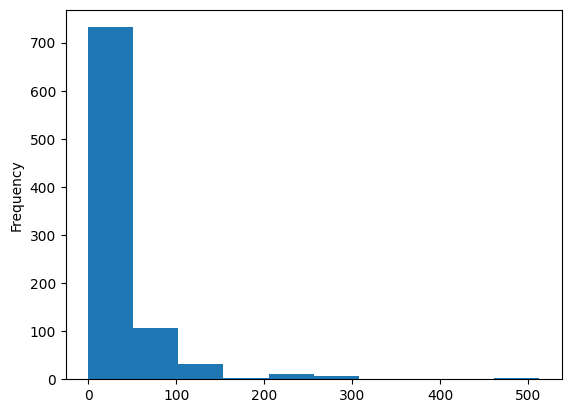

In [37]:
df["Fare"].plot(kind="hist")